# Section 5

###### V. Hunter Adams

In [1]:
from IPython.display import Latex
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
from matplotlib import animation, rc
from IPython.core.display import HTML 
from IPython.display import HTML
from ipywidgets import *
from scipy.integrate import odeint
import plotly.plotly as py
import plotly
from numpy.linalg import pinv
import plotly.graph_objs as go
import pandas as pd
import plotly.tools as tls
import urllib2
from IPython.display import Image
tls.set_credentials_file(username='v.h.adams', api_key='werEw55EhyYuY92HZtTt')


## Half Lives

Radioactive decay is the process by which stuff turns into other stuff. Depending on which stuff is turning into which stuff, this can happen at a faster or slower rate. Do date something radiometrically, we measure how much of the old stuff is present and how much of the new stuff is present. If we know how much of the old stuff we started with, and the rate at which the old stuff turns into the new stuff, then we can determine the age of the material.

Consider Potassium-40, which decays to Argon-40 (10% of the time) and Calcium-40 (90% of the time) with a half life of 1.28 billion years. Using a mass-spectrometer, you measure 20 units of Potassium-40 for every one unit of Argon-40. How old is the sample?

Let's say that the initial number of Potassium-40's is given by the variable $K$ (this won't ultimately matter, but it's nice for clarity). To be clear:

\begin{align}
\text{Initial Potassium-40} &= K
\end{align}

After the first half-life, how many Potassium-40's will be left?

\begin{align}
K_{remaining} &= K - 0.5K\\
&= K(1-0.5)\\
&= 0.5K
\end{align}

How about after the second half life?

\begin{align}
K_{remaining} &= 0.5K - 0.5(0.5K)\\
&= 0.5K - 0.25K\\
&= K(0.5-0.25)\\
&= 0.25K\\
&= (0.5)^2K
\end{align}

After $N$ half-lives:

\begin{align}
K_{remaining} &= (0.5)^NK
\end{align}

What is the rate of Calcium production? Well, each Potassium that decays has a 90 percent chance of turning into a Calcium. So, after $N$ half-lives:

\begin{align}
Ca &= (K-K_{remaining})0.9 + Ca_{initial}\\
&= \left(K-0.5^NK\right)0.9 + Ca_{initial}
\end{align}

How about the number of Argons? Each Potassium has a 10 percent chance of turning into an Argon, so by similar logic:

\begin{align}
Ar &= (K-K_{remaining})0.1 + Ar_{initial}\\
&= \left(K-0.5^NK\right)0.1 + Ar_{initial}
\end{align}

But recall from lecture that the initial amount of Argon must be zero. Before the rock solidifies, all generated Argon can simply escape. Thus, the above becomes:

\begin{align}
Ar &= (K-K_{remaining})0.1\\
&= \left(K-0.5^NK\right)0.1
\end{align}

We are told that the ratio of Argons to Potassiums is $\frac{1}{20}$. We can write this as:

\begin{align}
\frac{Ar}{K_{remaining}} &= \frac{\left(K-(0.5)^NK\right)0.1}{(0.5)^NK} = \frac{1}{20}
\end{align}

The K's cancel:

\begin{align}
\frac{Ar}{K_{remaining}} &= \frac{\left(1-(0.5)^N\right)0.1}{(0.5)^N} = \frac{1}{20}
\end{align}

Solve for $0.5^N$:

\begin{align}
0.1 - 0.1(0.5)^N &= 20(0.5)^N
\end{align}

\begin{align}
0.1 &= 20.1(0.5)^N
\end{align}

\begin{align}
4.97512\times 10^{-3} &= (0.5)^N
\end{align}

\begin{align}
log(4.97512\times 10^{-3}) &= Nlog(0.5)
\end{align}

Solving for $N$:

\begin{align}
N &= 7.65\text{ half lives} = 9.79\text{ billion years}
\end{align}

## Dating Curves

Consider a sample composed of three constituent materials: Strontium 86, Strontium 87, and Rubidium 87. Strontium 86 is non-radiogenic (it doesn't decay into anything), but Rubidium 87 will decay into Strontium 87. We have no way of knowing what the initial concentrations of Rubidium and Strontium were, but we do know the rate with which Rubidium turns into Strontium 87. Under some assumptions, this is enough to calculate the age of the sample.

Suppose that the sample is initially completely melted. This means that the Sr86 and Sr87 are evenly distributed throughout the material. This means that, for any mineral that you sample within the material, you will find a constant ratio of Sr86 and 87 (since they're treated the same, chemically).

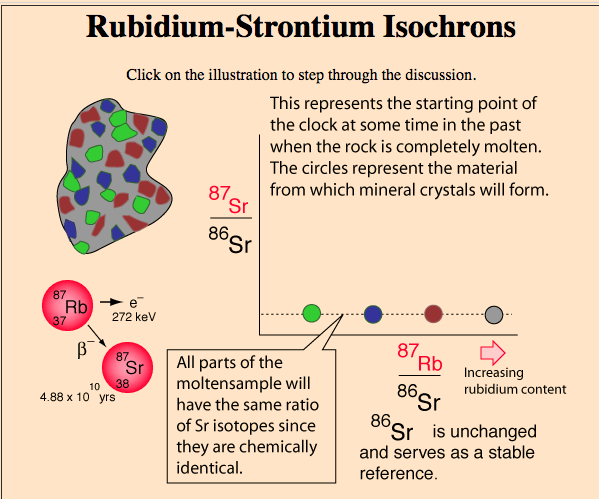

In [3]:
Image(filename = PATH + "firstone.png", width=600, height=600)

Some of the minerals, however, will have more Rubidium 87. The minerals with more Rubidium will produce more Sr87 than the minerals with less Rubidium. Thus, the straight, flat line becomes a straight, sloped line.

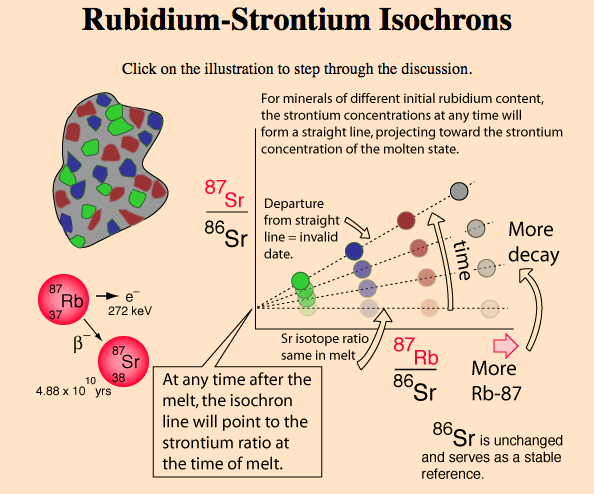

In [4]:
Image(filename = PATH + "secondone.png", width=600, height=600)

The slope of the line tells you the age of the sample, and the line points to the original Strontium ratio. We could rescale each of these axes such that the $x$ axis is the fraction of Rubidium in the sample and the y-axis is the fraction of Strontium 87 in the sample. If we do so, then what is the slope of the line that all points on the initial, horizontal line will follow?

*Answer*: -1. In fact, $y = 1-x$.

We can find the slope of the line that our data fits, and set the origin to the y-intercept of the line that our data fits. By solving for the intersection of this data line and the Sr/Rb line, we can find the $x$ that corresponds to that intercept. This represents the fraction of Rubidium remaining, which can be used to find the age of the sample using the techniques from the previous section.

## Mass Spectroscopy

Device for determining the *mass to charge ratio* of a sample. A sample is ionized (given some charge) and then passed through a magnetic field. The amount by which its path is diverted is proportional to its mass and its charge.

\begin{align}
F &= qv \times B\\
F &= ma
\end{align}